In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import lux
%matplotlib inline

import warnings


warnings.filterwarnings('ignore')

In [74]:
delete_this = [31221128,
               31221231,
               31221434,
               40921050,
               41021554,
               41221061,
               61221498,
               70821013,
               70821043,
               81221488,
               91021042,
               91221268,
               100122022,
               100122097,
               100122356,
               101221028,
               101221099,
               101221366,
               101221422,
               110921024,
               110921038,
               131121022,
               131221190,
               131221370,
               131221388,
               131221431,
               140921285,
               140921298,
               141221021,
               141221033,
               141221048,
               141221216,
               151021188,
               151021206,
               161221148,
               161221265,
               161221325,
               161221329,
               161221374,
               170921111,
               171221157,
               171221183,
               171221372,
               180921021,
               181121260,
               190921028,
               190921047,
               200921420,
               201021313,
               201121042,
               201221121,
               201221161,
               201221202,
               201221489,
               211221031,
               211221289,
               211221342,
               221021197,
               221121534,
               221221010,
               231221195,
               231221352,
               240921455,
               241121102,
               241121388,
               241221163,
               251021275,
               251121456,
               71221025,
               71221172,
               71221219,
               71221228,
               71221273,
               81221169,
               81221273,
               81221286,
               91221138,
               91221176,
               91221297,
               91221330,
               281221289]

In [75]:
hepa_oct = pd.read_csv("oct.csv")
hepa_oct.head()

,Orden,Prueba,Resultado,Sexo,Edad,Edad en Dias
0,10921133,BILT,0.87,F,25,9131
1,10921133,AST,45.00,F,25,9131
2,10921133,ALT,106.00,F,25,9131
3,10921133,ALP,121.00,F,25,9131
4,10921133,GGT,31.00,F,25,9131


In [76]:
hepa_oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Orden         2142 non-null   int64  
 1   Prueba        2142 non-null   object 
 2   Resultado     2129 non-null   float64
 3   Sexo          2137 non-null   object 
 4   Edad          2142 non-null   int64  
 5   Edad en Dias  2142 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 100.5+ KB


In [77]:
hepa_oct.shape

(2142, 6)

In [78]:
hepa_oct.describe().T

,count,mean,std,min,25%,50%,75%,max
Orden,2142.0,1.474997e+08,8.511296e+07,10921133.0,71221273.0,146071111.5,220921079.0,311021048.0
Resultado,2129.0,5.828257e+01,2.159673e+02,0.2,13.0,24.0,63.0,5972.0
Edad,2142.0,4.434827e+01,2.187191e+01,0.0,28.0,46.0,62.0,93.0
Edad en Dias,2142.0,1.619820e+04,7.988337e+03,0.0,10227.0,16801.0,22645.0,33967.0


In [79]:
nov5 = hepa_oct.drop(hepa_oct[hepa_oct.Orden.isin(delete_this)].index.tolist())
nov5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895 entries, 0 to 2141
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Orden         1895 non-null   int64  
 1   Prueba        1895 non-null   object 
 2   Resultado     1895 non-null   float64
 3   Sexo          1890 non-null   object 
 4   Edad          1895 non-null   int64  
 5   Edad en Dias  1895 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 103.6+ KB


In [80]:
nov5.isnull().sum()

Orden           0
Prueba          0
Resultado       0
Sexo            5
Edad            0
Edad en Dias    0
dtype: int64

In [82]:
mulls = nov5.drop(nov5[nov5.Sexo.isnull()].index.tolist())
mulls.isnull().sum()

Orden           0
Prueba          0
Resultado       0
Sexo            0
Edad            0
Edad en Dias    0
dtype: int64

In [83]:
mulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 2141
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Orden         1890 non-null   int64  
 1   Prueba        1890 non-null   object 
 2   Resultado     1890 non-null   float64
 3   Sexo          1890 non-null   object 
 4   Edad          1890 non-null   int64  
 5   Edad en Dias  1890 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 103.4+ KB


In [84]:
menores = mulls[mulls['Edad'] <= 17]
menores.nunique().head()

Orden         52
Prueba         5
Resultado    145
Sexo           3
Edad          15
dtype: int64

In [85]:
menores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 45 to 2126
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Orden         260 non-null    int64  
 1   Prueba        260 non-null    object 
 2   Resultado     260 non-null    float64
 3   Sexo          260 non-null    object 
 4   Edad          260 non-null    int64  
 5   Edad en Dias  260 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 14.2+ KB


In [86]:
menores.head()

,Orden,Prueba,Resultado,Sexo,Edad,Edad en Dias
45,11121365,BILT,0.6,M,17,6209
46,11121365,AST,23.0,M,17,6209
47,11121365,ALT,15.0,M,17,6209
48,11121365,ALP,189.0,M,17,6209
49,11121365,GGT,15.0,M,17,6209


# Quitar menores equivale a 260 pruebas de 52 personas.

In [87]:
nov5 = mulls[mulls['Edad'] > 17]
nov5 = nov5.drop(columns='Edad en Dias')
nov5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1630 entries, 0 to 2141
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Orden      1630 non-null   int64  
 1   Prueba     1630 non-null   object 
 2   Resultado  1630 non-null   float64
 3   Sexo       1630 non-null   object 
 4   Edad       1630 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 76.4+ KB


# Quedan 1630 pruebas para 325 personas

In [88]:
novnp = nov5.to_numpy()
print(novnp)

[[10921133 'BILT' 0.87 'F' 25]
 [10921133 'AST' 45.0 'F' 25]
 [10921133 'ALT' 106.0 'F' 25]
 ...
 [311021048 'ALT' 27.0 'F' 54]
 [311021048 'ALP' 141.0 'F' 54]
 [311021048 'GGT' 122.0 'F' 54]]


In [89]:
novnp.shape

(1630, 5)

In [90]:
temp_ced = []
temp_BLT = []
temp_AST = []
temp_ALT = []
temp_ALP = []
temp_GGT = []
temp_age = []
temp_sex = []
count = 0
for row in novnp:
    if count == 5:
        count = 0
    if row[0] not in temp_ced:
        temp_ced.append(row[0])
    if count == 0:
        temp_sex.append(row[3])
        temp_age.append(row[4])
    match row[1]:
        case "BILT":
            temp_BLT.append(row[2])
        case "AST":
            temp_AST.append(row[2])
        case "ALT":
            temp_ALT.append(row[2])
        case "ALP":
            temp_ALP.append(row[2])
        case _:
            temp_GGT.append(row[2])
    count += 1
temp_ced

[10921133,
 10921446,
 11021176,
 11021216,
 11021265,
 11021333,
 11021351,
 11121001,
 11121244,
 11121387,
 11221170,
 11221300,
 20921071,
 20921184,
 20921285,
 20921339,
 20921367,
 21121092,
 21121211,
 21121488,
 21221017,
 21221026,
 21221237,
 21221327,
 21221330,
 21221337,
 21221362,
 21221492,
 30821029,
 30821172,
 30821387,
 30821434,
 30821505,
 30921016,
 30921180,
 30921188,
 30921361,
 30921363,
 31021065,
 31121017,
 31121043,
 31121074,
 31221097,
 31221329,
 31221350,
 31221429,
 40821066,
 41021024,
 41021152,
 41021347,
 41021413,
 41021446,
 41021617,
 41121102,
 41121166,
 41121313,
 41121371,
 50821066,
 50821141,
 50821294,
 50821316,
 50821366,
 51021049,
 51021281,
 51021494,
 51121104,
 51121118,
 51121168,
 51121184,
 51121193,
 51221015,
 60821312,
 60921013,
 60921352,
 61021234,
 61021242,
 61021308,
 61021354,
 61121029,
 70921217,
 70921284,
 71021042,
 71021110,
 71021121,
 71021218,
 81021041,
 81021261,
 81021503,
 81021551,
 81121142,
 81121147,

In [91]:
clean_dict = {
    'Age':temp_age,
    'Sex':temp_sex,
    'ALP':temp_ALP,
    "ALT":temp_ALT,
    'AST':temp_AST,
    'BILT':temp_BLT,
    'GGT':temp_GGT,
    'Cedula':temp_ced,

}
df = pd.DataFrame(clean_dict)
df

,Age,Sex,ALP,ALT,AST,BILT,GGT,Cedula
0,25,F,121.0,106.0,45.0,0.87,31.0,10921133
1,33,F,198.0,315.0,65.0,0.90,706.0,10921446
2,41,M,38.0,33.0,21.0,0.80,63.0,11021176
3,47,F,81.0,19.0,15.0,0.30,29.0,11021216
4,75,M,135.0,41.0,33.0,1.01,29.0,11021265
...,...,...,...,...,...,...,...,...
321,44,F,80.0,24.0,23.0,0.99,17.0,301121381
322,29,F,188.0,16.0,17.0,0.58,25.0,301121422
323,56,F,136.0,20.0,22.0,0.41,46.0,310821298
324,73,F,93.0,11.0,14.0,0.41,16.0,310821410


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     326 non-null    int64  
 1   Sex     326 non-null    object 
 2   ALP     326 non-null    float64
 3   ALT     326 non-null    float64
 4   AST     326 non-null    float64
 5   BILT    326 non-null    float64
 6   GGT     326 non-null    float64
 7   Cedula  326 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 20.5+ KB


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,326.0,5.027914e+01,1.753779e+01,18.00,3.600000e+01,52.0,6.300000e+01,9.300000e+01
ALP,326.0,1.042025e+02,6.108629e+01,38.00,7.600000e+01,91.0,1.140000e+02,7.330000e+02
ALT,326.0,4.434969e+01,1.064098e+02,8.00,1.625000e+01,24.0,3.600000e+01,1.044000e+03
AST,326.0,5.233742e+01,3.325936e+02,11.00,1.900000e+01,23.0,3.000000e+01,5.972000e+03
BILT,326.0,7.827607e-01,7.502293e-01,0.27,4.725000e-01,0.6,8.600000e-01,1.084000e+01
GGT,326.0,6.546933e+01,1.145554e+02,8.00,2.100000e+01,31.0,6.375000e+01,9.620000e+02
Cedula,326.0,1.512732e+08,8.842614e+07,10921133.00,7.102106e+07,160871102.0,2.309213e+08,3.110210e+08


<AxesSubplot:xlabel='ALP', ylabel='Density'>

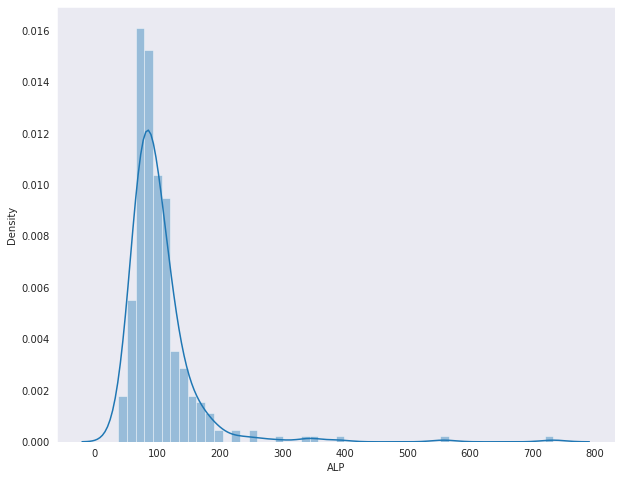

In [94]:
sns.set_style('dark')
plt.figure(figsize=(10, 8))
sns.distplot(a= df['ALP'], kde=True)

<AxesSubplot:xlabel='AST', ylabel='Density'>

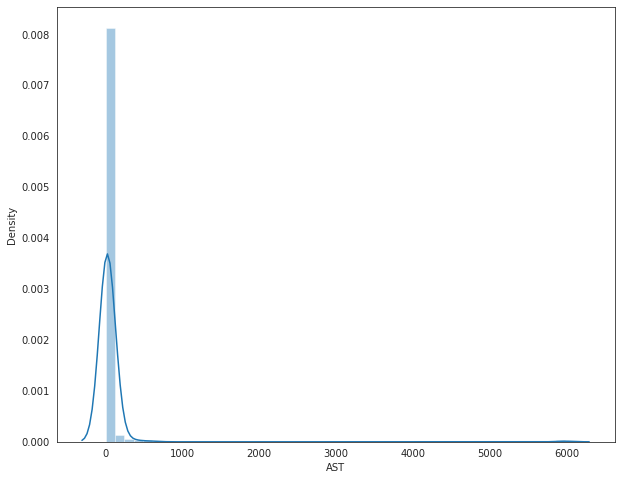

In [95]:
sns.set_style('white')
plt.figure(figsize=(10, 8))
sns.distplot(a= df['AST'], kde=True)

<AxesSubplot:xlabel='ALT', ylabel='Density'>

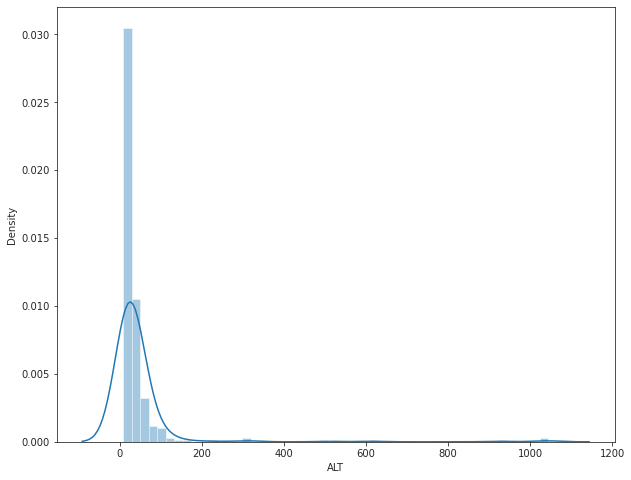

In [96]:
sns.set_style('ticks')
plt.figure(figsize=(10, 8))
sns.distplot(a= df['ALT'], kde=True)

<AxesSubplot:xlabel='BILT', ylabel='Density'>

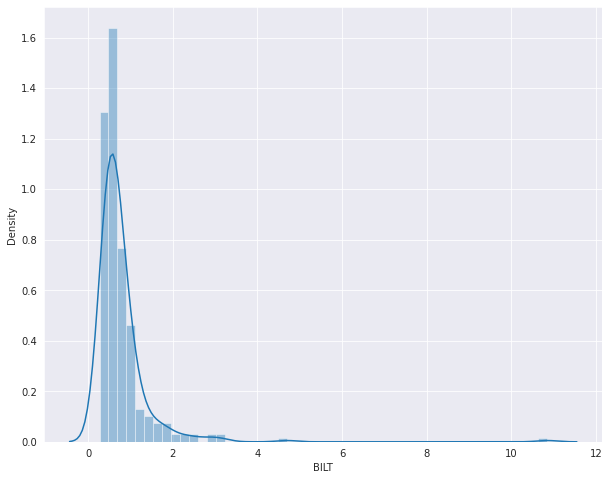

In [97]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.distplot(a= df['BILT'], kde=True)

<AxesSubplot:xlabel='GGT', ylabel='Density'>

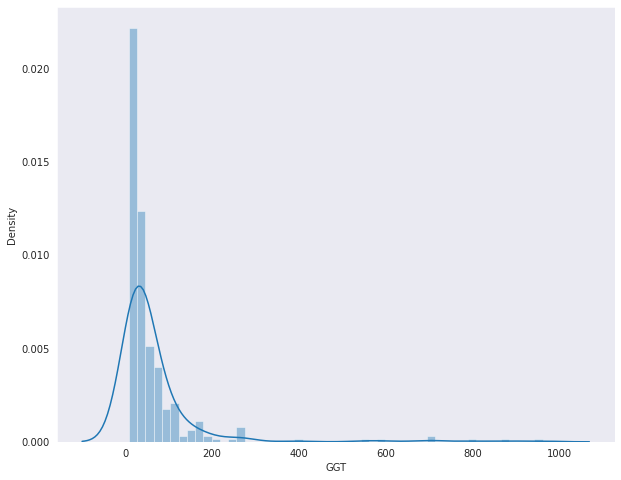

In [98]:
sns.set_style('dark')
plt.figure(figsize=(10, 8))
sns.distplot(a= df['GGT'], kde=True)

In [99]:
#df.drop(columns="Cedula")
df.to_csv("oct_clean.csv", index=False)